# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [76]:
pip install scikit-learn

In [77]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [78]:
pip install palmerpenguins

In [79]:
from palmerpenguins import load_penguins

In [93]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [96]:
penguins = pd.get_dummies(penguins, columns = ['species', 'island', 'sex'])

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [97]:
penguins = penguins.dropna(subset = ['bill_length_mm', 'bill_depth_mm'])

In [99]:
y = penguins["bill_depth_mm"].values
X = penguins[["bill_length_mm"]].values

In [100]:
models = {}
predictions = pd.DataFrame({"bill_length_mm": X.flatten()})

In [119]:
# Simple Linear Regression Model
linear_model = LinearRegression().fit(X, y)

predictions["linear model"] = linear_model.predict(X)
models["linear"] = linear_model

In [120]:
# Quadratic Model
X2 = X ** 2
quadratic_model = LinearRegression().fit(X2, y)

predictions["quadratic model"] = quadratic_model.predict(X2)
models["quadratic"] = quadratic_model

In [121]:
# Cubic Model
X3 = X ** 3
cubic_model = LinearRegression().fit(X3, y)

predictions["cubic model"] = cubic_model.predict(X3)
models["cubic"] = cubic_model

In [122]:
# Degree 10 Model
X10 = X ** 10
degree_10_model = LinearRegression().fit(X10, y)

predictions["degree 10 model"] = degree_10_model.predict(X10)
models["degree 10"] = degree_10_model

In [123]:
# Making into df
df = predictions.melt(id_vars = "bill_length_mm",
                           var_name = "model",
                           value_name = "bill_depth_mm")

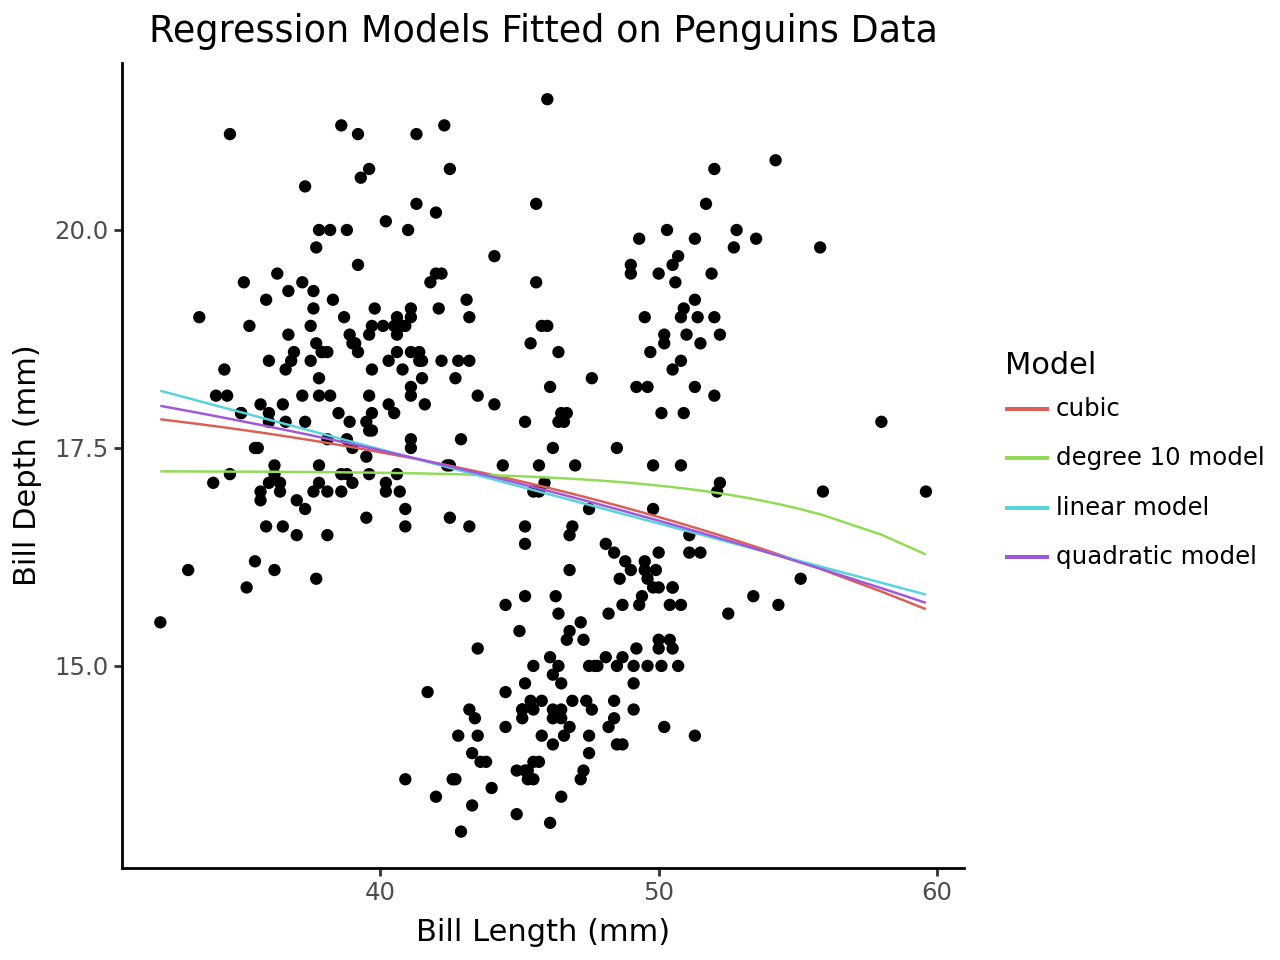

In [117]:
# Scatterplot
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme_classic
(
    ggplot(penguins,
           aes(
               x = "bill_length_mm",
               y = "bill_depth_mm"))
    + geom_point()
    + geom_line(df,
                aes(color = "model"))
    + labs(
        title = "Regression Models Fitted on Penguins Data",
        x = "Bill Length (mm)",
        y = "Bill Depth (mm)",
        color = "Model"
        )
    + theme_classic()
)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The linear model seems to be underfitting the data because it doesn't follow the curvature of the pattern of the data and the way in which it skews downward more heavily as bill length increases. It seems that there are notably more data points below the linear model regression line than above it, pointing to it underfitting the data. It seems the degree 10 model is overfitting the data because the curvature of that regression line doesn't mirror the downturn of the data as bill length increases. It seems more directed at capturing noise and outliers in the data than the overarching trend. I think the cubic model fits the data the best because its regression line most closely mirrors the shape of the data, following the downward trend with increased bill length.